In [85]:
import os
import pandas as pd
os.chdir("/home/udit/ipython/notebook/all/input")
xgb=pd.read_csv("submission.csv")
h2o=pd.read_csv("h2o_blend.csv")
df=pd.merge(xgb,h2o,on='id',how='left')
df.loc[:,'loss']=df.loss_x*0.85+df.loss_y*0.15
df[['id','loss']].to_csv("ensamblecsv.csv",index=False)

In [1]:
import os
import pandas as pd
os.chdir("/home/udit/ipython/notebook/all/input")
xgb_feature=pd.read_csv("xgb_6_submisson.csv")
keras=pd.read_csv("../submission_keras_shift_perm.csv")
iso=pd.read_csv("isotest.csv")

In [2]:
minlist=[ 28164,  31295,  32584,  40883,  44022,  49232,  50762,  53201,
        56847,  62475,  70040,  75384,  75549,  80768,  80784,  86131,
        88299, 117352, 133155, 163308, 196285, 209333, 221881, 223868,
       227540, 232150, 237549, 244537, 251327, 254168, 266505, 270295,
       274779, 278932, 283891, 289183, 290885, 297283, 304860, 311910,
       321977, 329561, 332719, 344509, 349981, 351961, 353002, 358267,
       365807, 376433, 377726, 384315, 387287, 408763, 417582, 419208,
       423610, 427321, 431284, 448026, 459418, 461036, 468311, 472293,
       472584, 479186, 532294, 539774, 540560, 541514, 548211, 549175,
       549587, 555093, 555402, 587524]
xgb_feature.loc[xgb_feature.id.isin([134574, 272417, 340105, 346331]),'loss']=37511
xgb_feature.loc[xgb_feature.id.isin(minlist),'loss']=256
xgb_feature.to_csv("xgb6_classified_outLiers.csv",index=False)

In [3]:
keras.loc[keras.id.isin([134574, 272417, 340105, 346331]),'loss']=37511
keras.loc[xgb_feature.id.isin(minlist),'loss']=256
keras.to_csv("keras6_classified_outLiers.csv",index=False)

In [4]:
xgb_feature.loc[:,'loss']=xgb_feature.loss*1.03
keras.loc[:,'loss']=keras.loss*1.006
df=pd.merge(xgb_feature,keras,on='id',how='left')
df.loc[:,"loss"]=df.loss_x*0.75+df.loss_y*0.25
df[['id','loss']].to_csv("keras_xgb_sub_gp_notbest.csv",index=False)

In [141]:
trainsub=pd.read_csv("trainsubmission.csv")
testsub=pd.read_csv("test_submission.csv")

In [135]:
%matplotlib inline

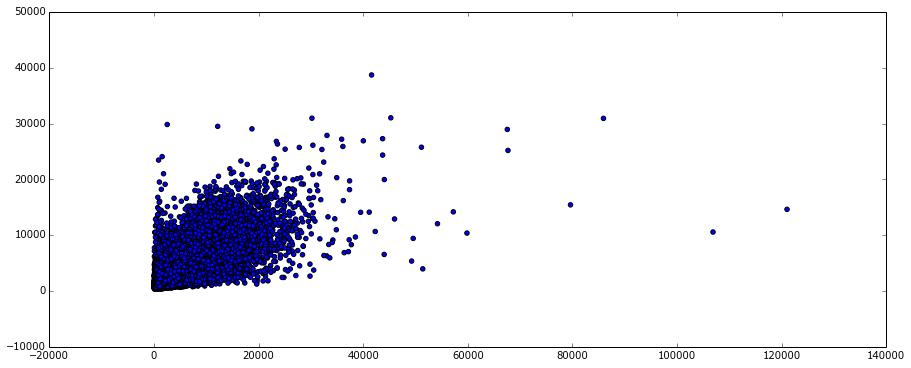

In [138]:
import numpy as np
import matplotlib.pyplot as plt
plt.figure(figsize=(15,6))
plt.scatter(trainsub.loss, trainsub.prediction);

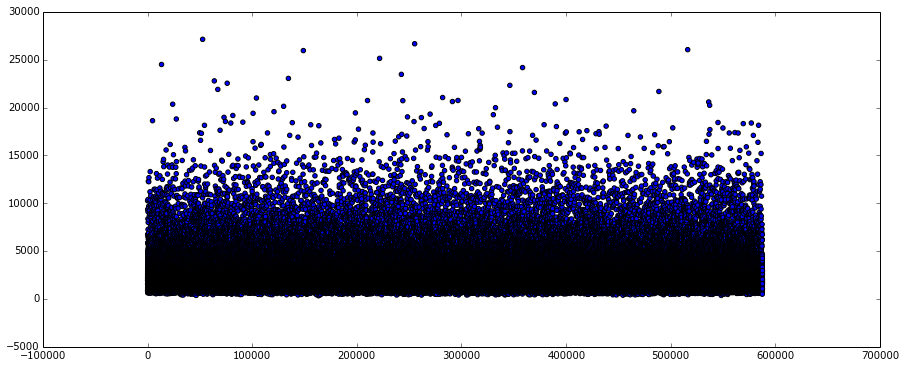

In [143]:
plt.figure(figsize=(15,6))
plt.scatter(testsub.id, testsub.prediction);

In [144]:
test=pd.read_csv('test.csv')

In [145]:
test=pd.merge(test,testsub,on='id',how='left')

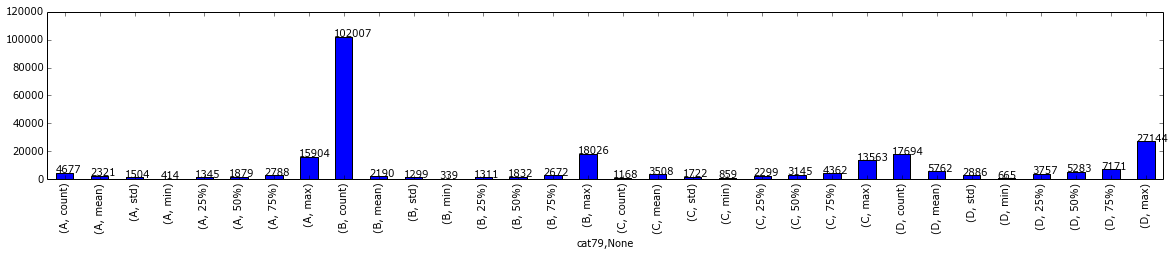

In [150]:
plot_bar(test.groupby('cat79').prediction.describe(),[20, 3])

In [148]:
%matplotlib inline
import numpy as np
from pylab import rcParams

def plot_bar(df,figsize=[15, 3]):
    rcParams['figure.figsize'] = figsize
    ax=df.plot(kind='bar')
    for p in ax.patches:
        height = p.get_height();
        if(np.isnan(height)):
            height=0;
        ax.text(p.get_x(), height +0.1, '%1.0f'%(height));
from sklearn.metrics import mean_absolute_error

In [140]:
mean_absolute_error(trainsub.loss, trainsub.prediction)

1130.8393700365716

In [45]:
import os
import pandas as pd
os.chdir("/home/udit/ipython/notebook/all/input")
xgb=pd.read_csv("submission.csv")
xbgr=pd.read_csv("xgb_starter_v7_R.sub.csv")
xgb_feature=pd.read_csv("submission_score1108_22171.csv")
keras=pd.read_csv("../submission_keras_shift_perm.csv")
gp_result=pd.read_csv("inputgptestpredictions.csv")
gp_result.loc[:,'loss']=gp_result[['p1', 'p2', 'p3','p4', 'p5', 'p6','p7', 'p8','p9','p10']].mean(axis=1)
gp_result=gp_result[['id','loss']]

In [46]:
xgb_feature.loc[:,'loss']=xgb_feature.loss*1.03
keras.loc[:,'loss']=keras.loss*1.006

In [47]:
df=pd.merge(xgb_feature,keras,on='id',how='left')

In [48]:
df=pd.merge(df,gp_result,on='id',how='left')

In [49]:
df.columns=['id','loss_x','loss_y','loss_z']

In [50]:
df.loc[:,"loss"]=df.loss_x*0.25+df.loss_y*0.50+df.loss_y*0.25

In [51]:
df[['id','loss']].to_csv("keras_xgb_sub_gp.csv",index=False)

In [14]:
df.loc[:,"loss"]=df.loss_x*0.60+df.loss_y*0.40
df[['id','loss']].to_csv("keras_xgb_sub.csv",index=False)

In [81]:
df=pd.merge(df,h2o,on='id',how='left')

In [82]:
df.columns=['id','loss_x','loss_y','loss_z']

In [83]:
df.loc[:,"loss"]=df.loss_x*0.34+df.loss_y*0.33+df.loss_y*0.33

In [84]:
df[['id','loss']].to_csv("keras_xgb_sub.csv",index=False)

In [16]:
Faronxgb=pd.read_csv("xgb_test_Faron.csv")
outputgbm=pd.read_csv("outputgbm.csv")

In [20]:
df=pd.merge(xgb,h2o,on='id',how='left')
df=pd.merge(df,Faronxgb,on='id',how='left')
df=pd.merge(df,outputgbm,on='id',how='left')

In [21]:
df.columns=['id','xgb','h2o','Faronxgb','outputgbm']

In [27]:
df.loc[:,'loss']=df.xgb*0.70+df.h2o*0.15+df.outputgbm*0.15
df[['id','loss']].to_csv("ensamblecsv.csv",index=False)

In [106]:
n=10

In [108]:
l=n**0.25

In [110]:
l**(1/0.25)

9.999999999999998